# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

C:\Users\Matheus\AppData\Local\Temp\ipykernel_14240\3186616964.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels = rotulos, rotation=90)
C:\Users\Matheus\AppData\Local\Temp\ipykernel_14240\3186616964.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels = rotulos, rotation=90)


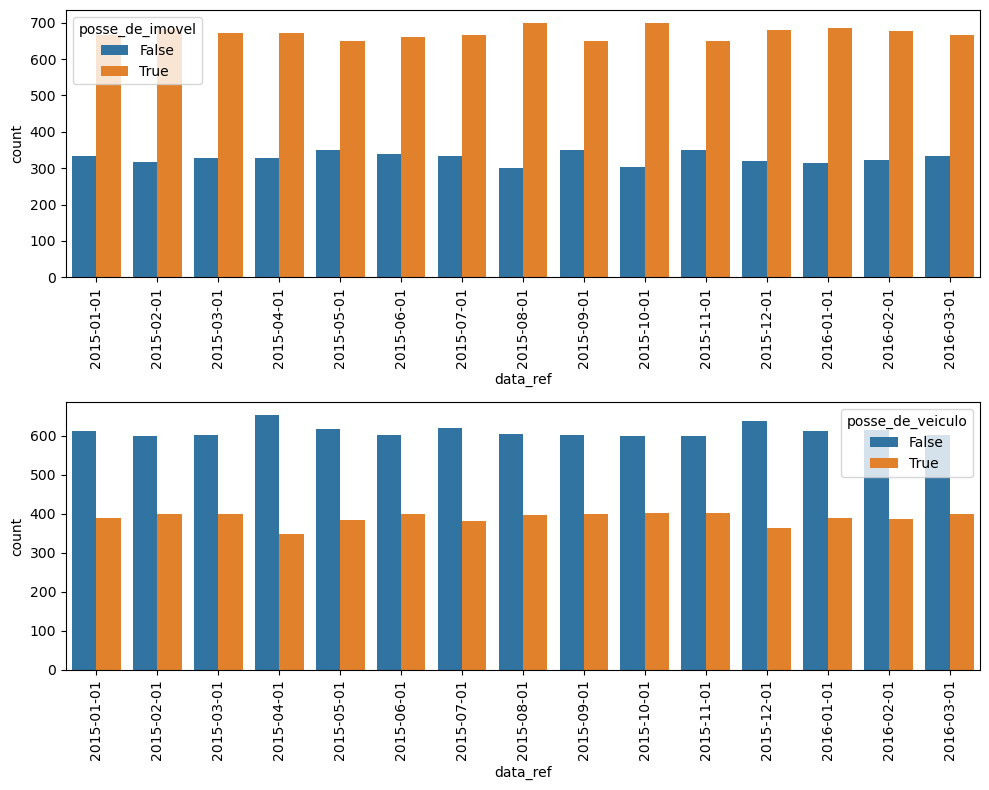

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


previsao = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
ax1 = sns.countplot(x='data_ref', hue='posse_de_imovel', data=previsao, ax=ax1)
rotulos = previsao['data_ref'].unique()
ax1.set_xticklabels(labels = rotulos, rotation=90)

ax2 = sns.countplot(x='data_ref', hue='posse_de_veiculo', data=previsao, ax=ax2)
ax2.set_xticklabels(labels = rotulos, rotation=90)

plt.tight_layout()
plt.show()

O grafico parece apresentar uma flutuação cíclica curiosa, como um gráfico senoide extremamente achatado, que provavelmente indica um evento que é cíclico no tempo! Podemos notar que nos meses de abrile dezembro, as possibilidades de a posse de carro ser um False parece ser significativamente maior. Isso provavelmente é um sintoma de alguma estratégia de elisão fiscal, por exemplo. 

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

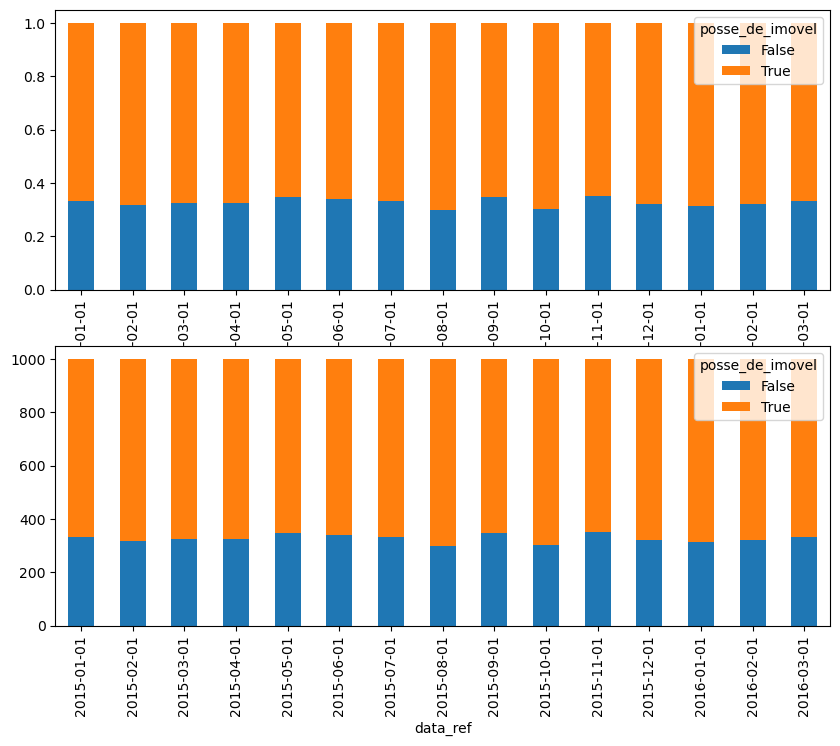

In [83]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

tab = pd.crosstab(previsao['data_ref'], previsao['posse_de_imovel'])
tab.div(tab.sum(axis=1), axis=0)

tab_freq = pd.crosstab(previsao['data_ref'], previsao['posse_de_imovel'])
tab = tab_freq.div(tab.sum(axis=1), axis=0)
ax1 = tab.plot.bar(stacked=True, ax=ax1)

tab_freq = pd.crosstab(previsao['data_ref'], previsao['posse_de_imovel'])
tab = tab_freq.div(tab.sum(axis=1), axis=0)
ax2 = tab.plot.bar(stacked=True, ax=ax2)


O que podemos notar aqui, novamente, é um suave padrão senoidal, que indica que, possivelmente, a nossa posse de imóveis e veículos flutuam com um período de aproximadamente 6 meses, provavelmente devido a alguma estratégia de elisão fiscal, por exemplo.